# K-means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Import Data
df_RUN_19 = pd.read_excel('test_data/RUN_19_TO_21_CLEANED.xlsx')
df_RUN_21 = pd.read_excel('test_data/RUN_19_TO_21_CLEANED.xlsx',sheet_name='Run 21')
df_RUN_13 = pd.read_excel('test_data/RUN_13_TO_15_CLEANED.xlsx')

run_13 = df_RUN_13[3:]

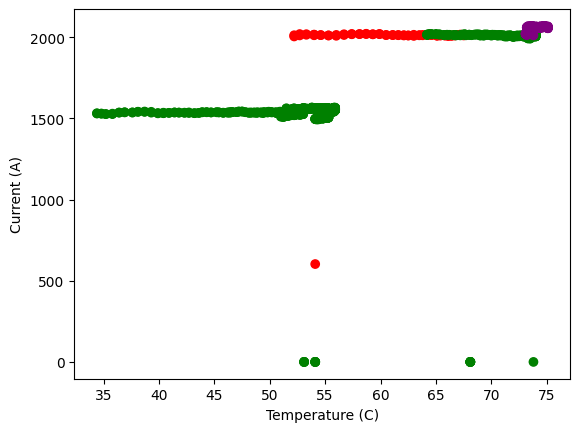

In [3]:
colors = {
    'NORMAL': 'green',
    'TORQUE DEFECT PHASE B': 'red',
    'TORQUE DEFECT CONECTOR TERMINALS': 'purple'
}
colorsList = [colors.get(status[0]) for status in run_13[['CLASSIFICATION']].to_numpy().tolist()]
plt.scatter(run_13[['zigbee:21_zd_Temp']],run_13[['zigbee:24_zd_IA']],color=colorsList)
plt.xlabel('Temperature (C)')
plt.ylabel('Current (A)')
plt.show()


5


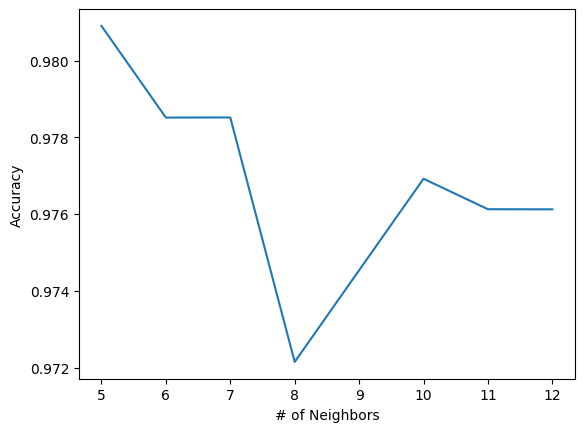

In [16]:
# Splitting Test and Training Data
# Not really the best way to discretize the targets but good enough for a concept
colors = {
    'NORMAL': 0,
    'TORQUE DEFECT PHASE B': 1,
    'TORQUE DEFECT CONECTOR TERMINALS': 2
}
targetList = [colors.get(status[0]) for status in run_13[['CLASSIFICATION']].to_numpy().tolist()]
X_train, X_test, Y_train, Y_test = train_test_split(run_13[['zigbee:21_zd_Temp','zigbee:24_zd_IA']], targetList, test_size=0.2)
cross_value_scores = []

# Neighbors to test / X Axis
neighbors = [5,6,7,8,9,10,11,12]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)
    avg = np.mean(scores)
    cross_value_scores.append(avg)

best_n_neighbors = neighbors[np.argmax(cross_value_scores)]
print(best_n_neighbors)

# Plotting
fig, ax = plt.subplots()
plt.plot(neighbors,cross_value_scores)
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy")
plt.show()


# Gradient Boosting Regression

The mean squared error (MSE) on test set: 0.0191


C:\Users\reza4\AppData\Local\Temp\ipykernel_21248\1061477608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_13['time_delta'] = (run_13['Element ID'] - run_13['Element ID'].min())
C:\Users\reza4\AppData\Local\Temp\ipykernel_21248\1061477608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_13['time_delta'] = run_13['time_delta'].map(func)
C:\Users\reza4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb

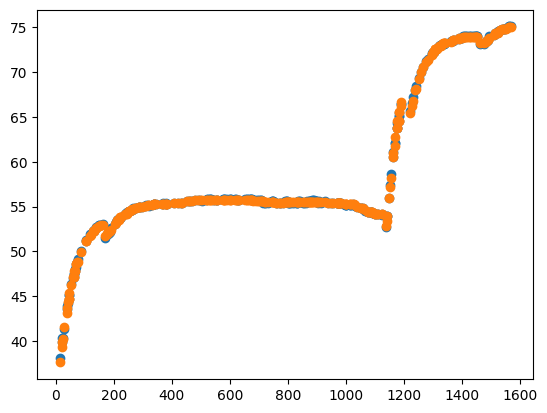

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

def func(t):
    return t.total_seconds()/60

run_13['time_delta'] = (run_13['Element ID'] - run_13['Element ID'].min())
run_13['time_delta'] = run_13['time_delta'].map(func)

X_train, X_test, Y_train, Y_test = train_test_split(run_13[['time_delta']], run_13[['zigbee:21_zd_Temp']], test_size=0.2)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

plt.scatter(X_test,Y_test)
plt.scatter(X_test, Y_pred)
plt.show()




# Neural Networks

In [ ]:
import sklearn.neural_network as sk

model = sk.MLPRegressor(hidden_layer_sizes=(10,10),max_iter=1000)
